<a href="https://colab.research.google.com/github/DarkSteelD/ColabSpace/blob/NN_labs/Lab4_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FashionMNIST" data-toc-modified-id="FashionMNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>FashionMNIST</b></a></span></li><li><span><a href="#FashionMNIST" data-toc-modified-id="FashionMNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><b>FashionMNIST</b></a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><b>Данные</b></a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><b>Задание</b></a></span></li></ul></div>

---

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

---

В этом ноутбуке Вам предстоит самостоятельно попрактиковаться в написаноо нейросетей для распознавания датасета, похожего на MNIST, но более интересного -- чёрно-белых изображений одежды.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

Беру датасет с [Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist)  

In [1]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

In [2]:
from torchvision.datasets.utils import extract_archive

# Define the directory containing the IDX files
data_dir = '/content/sample_data/'

trainset = torchvision.datasets.FashionMNIST(root=data_dir, train=True, download=True, transform=None)
testset = torchvision.datasets.FashionMNIST(root=data_dir, train=False, download=True, transform=None)


classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


100%|██████████| 26421880/26421880 [00:14<00:00, 1835209.00it/s]


Extracting /content/sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 132325.23it/s]


Extracting /content/sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2384433.17it/s]


Extracting /content/sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19629342.72it/s]

Extracting /content/sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

Посмотрите на датасет.
* Сколько в нём классов?
* Сколько картинок в train? В test?
* Выведите несколько картинок с помощью `pyplot`

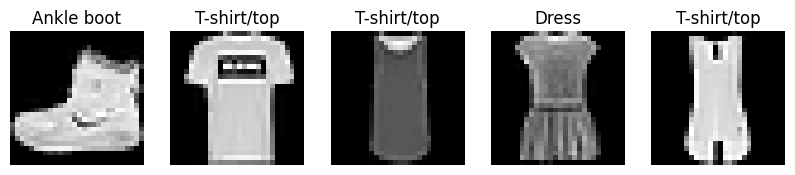

In [3]:

num_images_to_show = 5
fig, axes = plt.subplots(1, num_images_to_show, figsize=(10, 2))

for i in range(num_images_to_show):
    # Get the image and label
    image, label = trainset[i]
    image = np.array(image)
    if len(image.shape) == 2:
        image = image.squeeze()
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(classes[label])
    axes[i].axis('off')

plt.show()


<h2 style="text-align: center;"><b>Задание</b></h2>

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите Свёрточную сеть, классифицирующую этот датасет.
Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import models

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 26421880/26421880 [00:14<00:00, 1842166.81it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 64633.71it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 496188.74it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5189203.80it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
class OptimizedNet(nn.Module):
    def __init__(self):
        super(OptimizedNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x)), 0.01))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x)), 0.01))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x)), 0.01))
        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


optimized_net = OptimizedNet()

criterion = nn.CrossEntropyLoss()

In [6]:



optimizer = optim.Adam(optimized_net.parameters(), lr=0.005) # lr change

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = optimized_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = optimized_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.4f} %')


Finished Training
Accuracy of the network on the 10000 test images: 89.6400 %


In [7]:
class OptimizedResNet50(nn.Module):
    def __init__(self):
        super(OptimizedResNet50, self).__init__()
        resnet50 = models.resnet50(pretrained=True)
        for param in resnet50.parameters():
            param.requires_grad = False

        num_ftrs = resnet50.fc.in_features
        resnet50.fc = nn.Linear(num_ftrs, 10)
        self.resnet50 = resnet50

    def forward(self, x):
        return self.resnet50(x)

optimized_net = OptimizedResNet50()

criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 75.7MB/s]


In [8]:

optimizer = optim.Adam(optimized_net.resnet50.fc.parameters(), lr=0.005)

# Training loop
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.expand(-1, 3, -1, -1)
        optimizer.zero_grad()
        outputs = optimized_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.expand(-1, 3, -1, -1)
        outputs = optimized_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.4f} %')



Finished Training
Accuracy of the network on the 10000 test images: 74.0700 %
